In [1]:
!pip install -q qiskit
!pip install -q qiskit-aer
!pip install -q pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
import random

Marked state: |11⟩


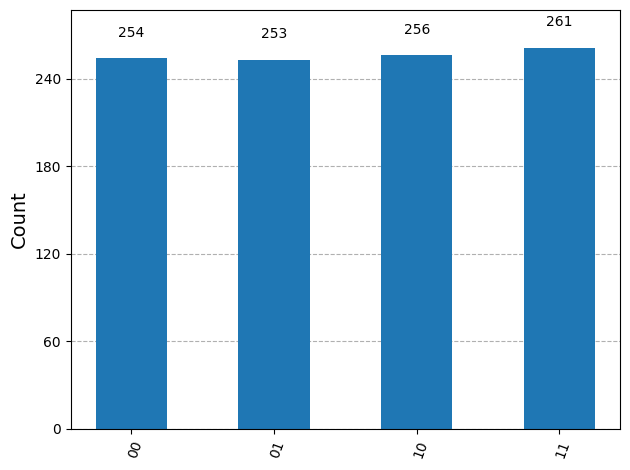

In [12]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import random

n = 2  #showing for n=2 qubits
qc = QuantumCircuit(n, n)

#applying initial hadamard gates
for i in range(n):
  qc.h(i)

#choosing a random integer to be marked as the target
target = random.randint(0, 2**n - 1)
bitstring = format(target, f'0{n}b')
print(f"Marked state: |{bitstring}⟩")

for x in range(20):
  #converting target gate to |11...1)
  for i, bit in enumerate(reversed(bitstring)):
      if bit == '0':
          qc.x(i)

  #applying c-z gate to mark that gate
  qc.h(n - 1)
  qc.cx(0,1)
  qc.h(n - 1)

  #undoing the x-gates
  for i, bit in enumerate(reversed(bitstring)):
      if bit == '0':
          qc.x(i)

  #applying the diffusion operator
  qc.h(range(n))
  qc.x(range(n))

  #applying multi-controlled Z to |00...0⟩
  qc.h(n - 1)
  qc.cx(0,1)
  qc.h(n - 1)

  #Undo X and H
  qc.x(range(n))
  qc.h(range(n))

#measurement
qc.measure(range(n), range(n))

sim = AerSimulator()
result = sim.run(qc).result()
counts = result.get_counts()

#plotting the result
plot_histogram(counts)